# BMEB W4020: Circuits in the Brain 2018 Fall Project \#1
*Author:* Tingkai Liu <tl2747@columbia.edu>

Copyright 2018 Aurel A. Lazar, Tingkai Liu

## Project 1: Synaptic Input and Oscillatory Circuits
For this project, you will investigate the complex dynamic given by a bursty neuron and connect two bursty neurons together.

Please do the following:

1. Implement a Bursty Neuron model, plot the trajectory `V,m,c` in 3D state space as well as the time traces of `V,m,c` under a constant external current $I_{ext} = 35.6 \mu A$. Additionally, plot the 3D trajectory of Hodgkin Huxley model for a injected current that is sufficient to produce tonic spiking. Compare the two trajectories, what are the differences? Can you identify the difference that gives rise to the bursty behavior of the Bursty Neuron?
2. (See first figure below) Connect the bursty model implemented in part 1 to a Rinzel model via 10 synapses following the model described below. 
    1. The Rinzel model has a constant injected current of $15 \mu A$ to make it constantly spiking
    2. The 10 Synapses are connected to the same postsynaptic Rinzel model, therefore you need to sum the input current as in homework 2.
    3. Experiment with the following and discuss your findings:
        1. Using inhibitory synapses, discuss Rinzel's response for different maximum synaptic conductance $\bar{g}_{syn}$. Try a large range of values.
        2. Using excitatory synapses ($E_{rev}=0$), repeat the above step. 
        3. Discuss Rinzel's response when the synapses are excitatory $E_{rev} = 0$ vs inhibitory $E_{rev} = -70$ vs a mixture while keeping others as default.
        4. Using excitatory synapses, disucss Rinzel's response for different $\alpha$ values. 
        5. Using excitatory synapses, modulate the synapse's parameter `alpha` by setting it to be a _Time-varying_ waveform. Specifically, set `alpha` to 2 second long square pulse stimulus with pulse width of 0.2 seconds. The high value of the square pulse is `8^4` and the low value is `5^3`. If you were to use a bursty neuron to control a postsynaptic Rinzel model as shown here, what does control over `alpha` parameter allow you to do in terms of controlling the output of the Rinzel neuron?
3. (See second figure below) Connect two bursty neurons together
    1. Use two bursty neurons (let's call them `neuron1,neuron2`) of the same parameters. 
    2. Create two synapse (let's call them `synapse_1_2`,`synapse_2_1`), (not 20, just 2)
    3. Experiment with the following and discuss your findings. Think along the lines what kind of steady state activity is shown, how fast does the system converge to steady state. Do changes in some of these parameters produce degenerate responses (i.e. changing two parameters produce the same response)?
        1. Maximum conductance of two inhibitory synapses.
        2. Combination of excitatory(E) and inhibitory(I): [(E,I),(E,E),(I,I)]
        3. Rate of Synapse $\alpha$.

<center><img src='figures/bursty_rinzel.png'><img src='figures/two_bursty.png'></center>

## Bursty Neuron
The minimum bursting neuron model is described by


\begin{equation}
\begin{split}
\frac{dV}{dt} & =  -\frac{1}{C}\left[I_{Ca} + I_K + I_{KS} + I_L - I_{ext}\right] \\
\frac{dm}{dt} & =  \frac{\epsilon}{\tau_m(V)}\left[m_\infty{}(V) -m\right] \\
\frac{dc}{dt} & =  \frac{\delta}{\tau_c(V)}\left[c_\infty{}(V) - c\right]
\end{split}
\end{equation}


where $V$ and $m$ are the fast subsystem responsible for generating
individual spikes, while $c$ is the slow subsystem responsible for the
active and quiescent phases of bursting.

The currents in the "voltage" equation are given by

\begin{equation}
\begin{split}
I_{Ca} & = \bar{g}_{Ca}n_\infty{}(V)\cdot\left[V - E_{Ca}\right] \\
I_K & = \bar{g}_Km\cdot\left[V - E_K\right] \\
I_{KS} & = \bar{g}_{KS}c\cdot\left[V - E_K\right] \\
I_L & = \bar{g}_L\cdot\left[V - E_L\right] .
\end{split}
\end{equation}

The steady state gating variables amount to
\begin{equation}
\begin{split}
n_\infty & = \frac{1}{2}\left[1 +\tanh(k_{0_{Ca}}(V-V_{th_{Ca}}))\right] \\
m_\infty & =  \frac{1}{2}\left[1 +\tanh(k_{0_{K}}(V-V_{th_{K}}))\right] \\
c_\infty & =  \frac{1}{2}\left[1 + \tanh(k_{0_{KS}}(V-V_{th_{KS}}))\right]
\end{split}
\end{equation}

And the time constants are, noting that $k_{0_K}$ is used in both
cases, but $v_{th_K}$ and $v_{th_{KS}}$ are used as expected.


\begin{equation}
\begin{split}
\tau_m & = \text{sech}\left(\frac{k_{0_{K}}}{2}(V-V_{th_{K}})\right) \\
\tau_c & = \text{sech}\left(\frac{k_{0_{K}}}{2}(V-V_{th_{KS}})\right) 
\end{split}
\end{equation}

The parameters of the minimal bursting neuron model are given as:


|.|$Ca$ | $K$ | $KS$ | $L$|
|-|-|-|-|-|
|$\bar{g}$ | $4.4$ | $9.0$ | $.19^*$ | $2.0$|
|$E$ | $120$ | $-80$ | $-80$ | $-60$|
|$V_{th}$ | $-1.2$ | $2.0$ | $-27$ | $\cdot$|
|$k_0$ | $1/18$ | $0.1$ | $0.8$ | $\cdot$|


| $C$ | $\delta$ | $\epsilon$| $I_{ext}$ |
|-|-|-|-|
|1.2 | .052 | 4.9 | $35.6^*$ |

Voltage is measured in [mV] and time in [ms]. For simplicity, all other states and parameters are given in normalized units. 

## Synapse
The synaptic current is given as :
$$
I_{syn} = \bar{g}_{syn}s\cdot(V_{post} - E_{rev}) ,
$$
where $I_{syn}$ is the current induced in the postsynaptic cell and
$g_{syn}$ denotes the synaptic strength.
$$
\dot{s} = \alpha{}G(V_{pre})(1-s) - \beta{}s, \quad
\mathrm{with} \quad G(V_{pre}) = \frac{T_{max}}{1 +
e^{-k_{pre}\left(V_{pre} - E_{syn}^{pre}\right)}} ,
$$
where $V_{pre}$ is the potential of the presynaptic neuron. The parameters $\alpha$, $\beta$
and the concentration transmitter release $G(V_{pre})$ determine the synaptic dynamics.
The parameters of the synapse are given by


|$E_{syn}^{pre}$ | $E_{rev}$ | $k_{pre}$ | $\alpha$ | $\beta$ | $\bar{g}_{syn}$ | $T_{max}$|
|-|-|-|-|-|-|-|
|2 | -70 | 0.22 | 5000 | 0.180 | 0.03 | 0.002|

In the case of multiple synapses
$$
I_{syn} = \sum_i \bar{g}_{syn,i}s_i\cdot\left(V_{post} - E_{rev}\right)
$$

In [1]:
%plot -b inline -f svg -r 96 -s 1080,720

In [2]:
% Clear MATLAB Workspace first.
clearvars; close all; clc;
set(groot,'defaulttextinterpreter','latex');  
set(groot, 'defaultAxesTickLabelInterpreter','latex');  
set(groot, 'defaultLegendInterpreter','latex');
rng(20184020);
fontsize = 12;
linewidth = 1.5;

# 1. Implementing Bursty Neuron Model

In [3]:
spike_detect_online = @(V,threshold) (V(2)>V(1)) & (V(2) > V(3)) & (V(2) > threshold);
spike_detect = @(V,threshold) [false,(V(2:end-1)>V(1:end-2)) & (V(2:end-1) > V(3:end)) & (V(2:end-1) > threshold),false];

dt = 1e-6; % Set time step
t = -0.05:dt:0.4; % Create Time Signal
Iext = 35.6*ones(size(t)); % Create fixed input current

global syn;
syn.dualsyn=0;                  % Controls whether we call one or two bursty neurons
out=bursty(t,Iext,[-36;0;1]);

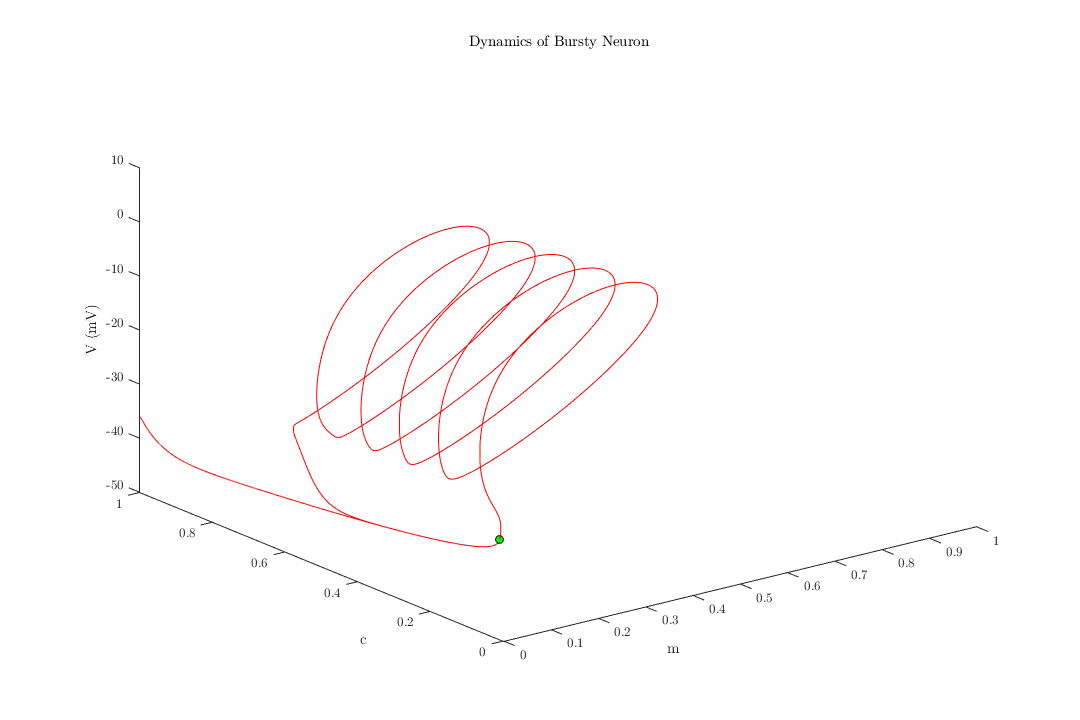

In [4]:
% Plotting the 3D trajectory
% NOTE: Please run in MATLAB to see the animation
figure(1)
view(axes(),3)
title('Dynamics of Bursty Neuron');
xlim([0 1]); ylim([0 1]); zlim([-50 10]);
xlabel('m'); ylabel('c'); zlabel('V (mV)');
hold on
plot3(out(2,:),out(3,:),out(1,:),'r');
temp=[];
for i=1:200:length(t)
    delete(temp);
    temp=plot3(out(2,i),out(3,i),out(1,i),'ko');
    set(temp,'markerfacecolor','g');
    pause(0.01);
end

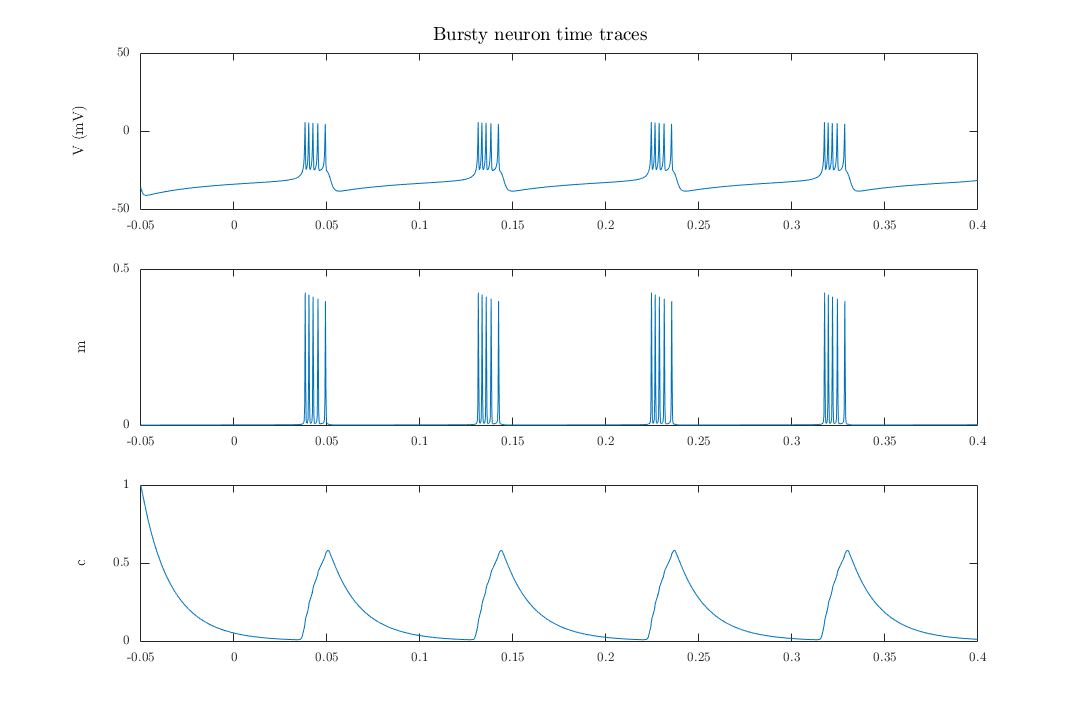

In [5]:
% Plotting the time traces
figure(2)
suptitle('Bursty neuron time traces')
for i=1:size(out,1)
   subplot(size(out,1),1,i)
   xlabel('t(s)');
   plot(t,out(i,:))
end
subplot(size(out,1),1,1);
ylabel('V (mV)');
subplot(size(out,1),1,2);
ylabel('m');
subplot(size(out,1),1,3);
ylabel('c');
V.bursty=out(1,:); x.bursty=out(2:3,:); out=[];

Now, let us compare the trajectory of the bursty neuron with that of the HH neuron.

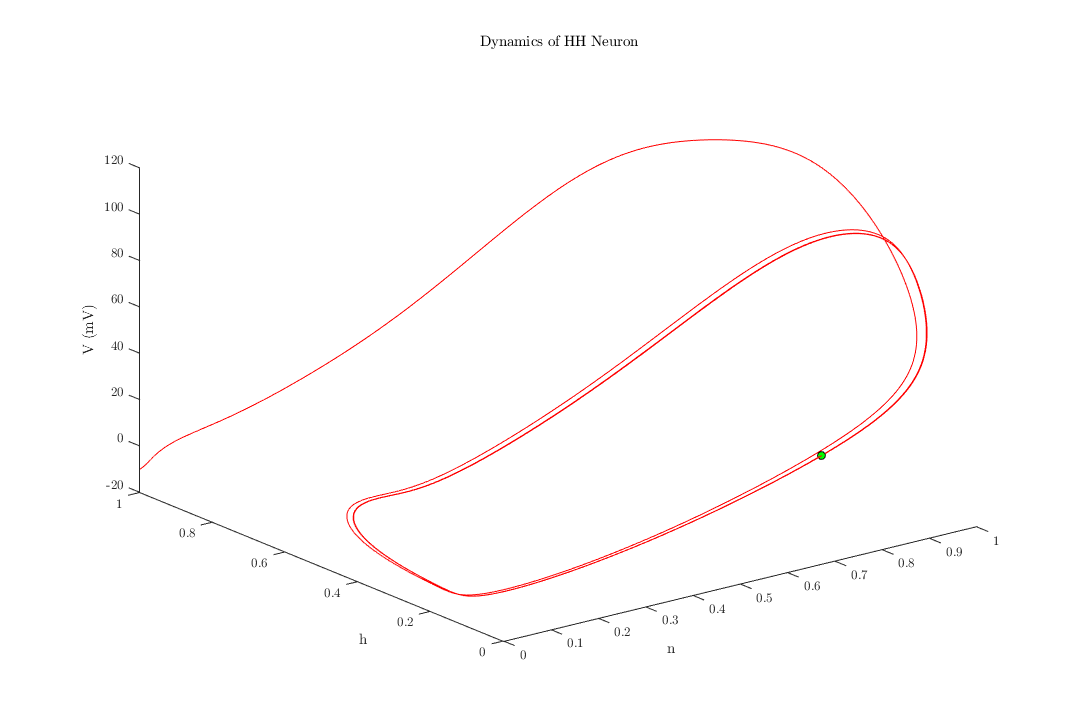

In [6]:
% Comparison with HH neuron wrt 3D trajectories
% NOTE: Please run in MATLAB to see the animation
[V.hh,x.hh]=hodgkin_huxley(t,7*ones(size(t)));

figure(3)
view(axes(),3)
title('Dynamics of HH Neuron');
xlim([0 1]); ylim([0 1]); zlim([-20 120]);
xlabel('n'); ylabel('h'); zlabel('V (mV)');
temp=[];
hold on
plot3(x.hh(2,:),x.hh(3,:),V.hh,'r');
for i=1:200:length(t)
    delete(temp);
    temp=plot3(x.hh(2,i),x.hh(3,i),V.hh(i),'ko');
    set(temp,'markerfacecolor','g');
    pause(0.01);
end

The HH neuron moves along a limit cycle while constantly spiking. The spikes come one after the other without any rest in between. However, when we look at the limit cycle of the Bursty neuron, we see that there are short periods of high spiking, followed by periods of rest, while the c value decays again to prepare for the next 'burst' of spikes. This difference arises due to how the states are modeled for the bursty neuron. The fast subsystem (via m) controls spiking, whereas the slow subsystem (via c) enables/disables it (small c causes spiking and buildup of c, which in turn stops spiking and causes decay of c).

# 2. Rinzel neuron with Bursty synaptic input

In [7]:
% Setting synaptic values
syn.E_pre=2; syn.E_rev=-70*ones(1,10); syn.k_pre=0.22; syn.alpha=5000; syn.beta=0.18;
syn.Gsyn=0.03; syn.Tmax=0.002;

### a. Inhibitory synapses for different maximum conductance $\bar{g}_{syn}$

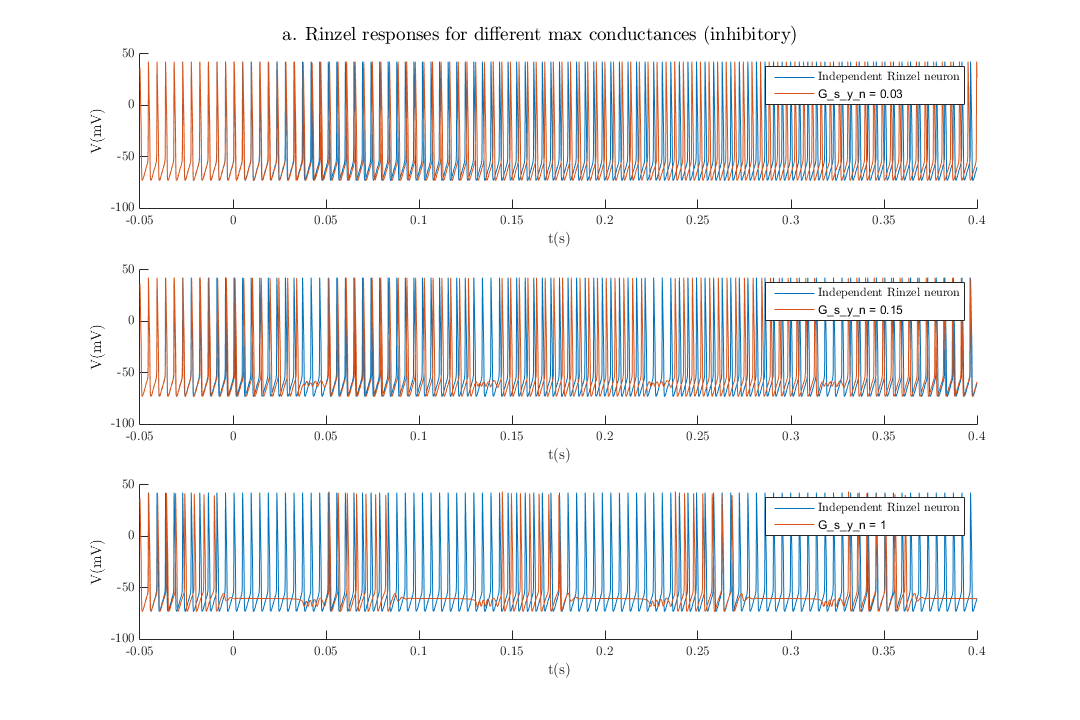

In [8]:
Iext=15*ones(size(t));
Gsyn=[0.03 .15 1];

[V.rinz,~]=hh_rinzel(t,Iext,[]);

figure(4)
suptitle('a. Rinzel responses for different max conductances (inhibitory)');
for i=1:length(Gsyn)
    subplot(length(Gsyn),1,i);
    hold on
    plot(t,V.rinz);
    syn.Gsyn=Gsyn(i);
    [V.rinz_syn,~]=hh_rinzel(t,Iext,repmat(V.bursty,size(syn.E_rev,1)));
    plot(t,V.rinz_syn)
    xlabel('t(s)')
    ylabel('V(mV)')
    legend('Independent Rinzel neuron',['G_s_y_n = ' num2str(Gsyn(i))])
end

We know that inhibitory synaptic input should prevent spiking. For this inhibitory synapse, the bursty input inhibits Rinzel spiking in the regions where bursty neuron spikes. Increasing the $\bar{g}_{syn}$ value increases these regions of inhibition and causes larger gaps in the Rinzel neuron spiking.

### b. Excitatory synapses for different maximum conductance $\bar{g}_{syn}$

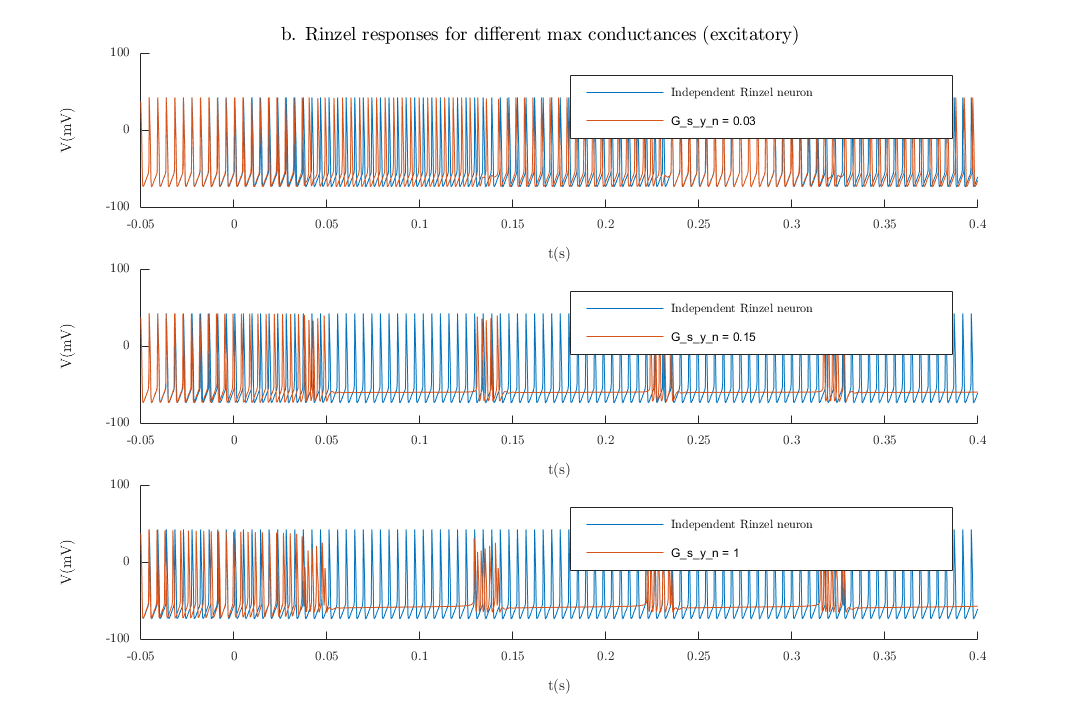

In [9]:
syn.E_rev=0*ones(1,10);

figure(5)
suptitle('b. Rinzel responses for different max conductances (excitatory)');
for i=1:length(Gsyn)
    subplot(length(Gsyn),1,i);
    hold on
    plot(t,V.rinz);
    syn.Gsyn=Gsyn(i);
    [V.rinz_syn,~]=hh_rinzel(t,Iext,repmat(V.bursty,size(syn.E_rev,1)));
    plot(t,V.rinz_syn)
    xlabel('t(s)')
    ylabel('V(mV)')
    legend('Independent Rinzel neuron',['G_s_y_n = ' num2str(Gsyn(i))]);
end

We know that excitatory synaptic input should enhance spiking. For this excitatory synapse, the bursty input enhances Rinzel spiking in the regions where bursty neuron spikes. Increasing the $\bar{g}_{syn}$ value causes more bursty spiking in the corresponding regions of the Rinzel neuron. Note that the nature of firing in the Rinzel neuron is bursty as the excitatory synapse adds highly negative synaptic current in periods of rest of bursty neuron.

### c. Mixture of excitatory and inhibitory synapses

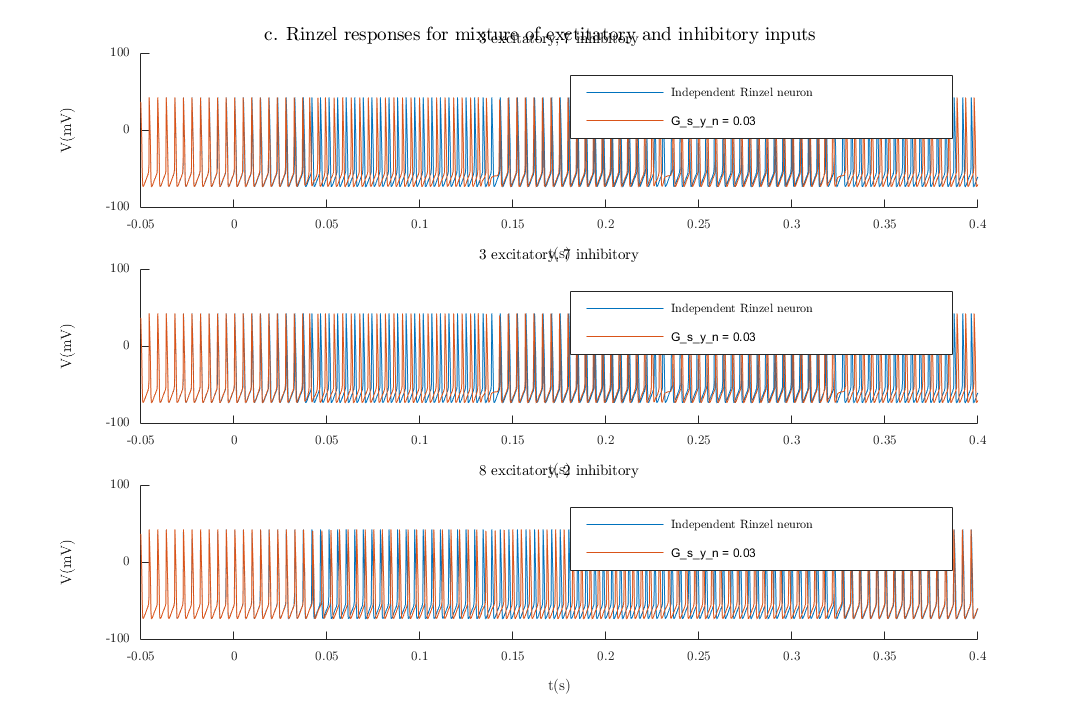

In [10]:
syn.Gsyn=0.03;

figure(6)
suptitle('c. Rinzel responses for mixture of exctitatory and inhibitory inputs');

for i=1:3
    subplot(3,1,i);
    hold on
    temp=randi([0 10],1,1);
    syn.E_rev=-70*ones(1,10);
    syn.E_rev(1:temp)=0;
    temp=sum(-syn.E_rev/70);
    plot(t,V.rinz);
    [V.rinz_syn,~]=hh_rinzel(t,Iext,repmat(V.bursty,size(syn.E_rev,1)));
    plot(t,V.rinz_syn)
    xlabel('t(s)')
    ylabel('V(mV)')
    title([num2str(temp) ' excitatory, ' num2str(10-temp) ' inhibitory']);
    legend('Independent Rinzel neuron',['G_s_y_n = ' num2str(syn.Gsyn)]);
end

Since all the 10 synapses are identical, an equal mixture of excitatory and inhibitory synapses cancel each other's effects out, and we see a more attenuated net effect leaning towards either excitatory or inhibitory nature depending upon the net majority.

### d. Excitatory synapses with different $\alpha$ values

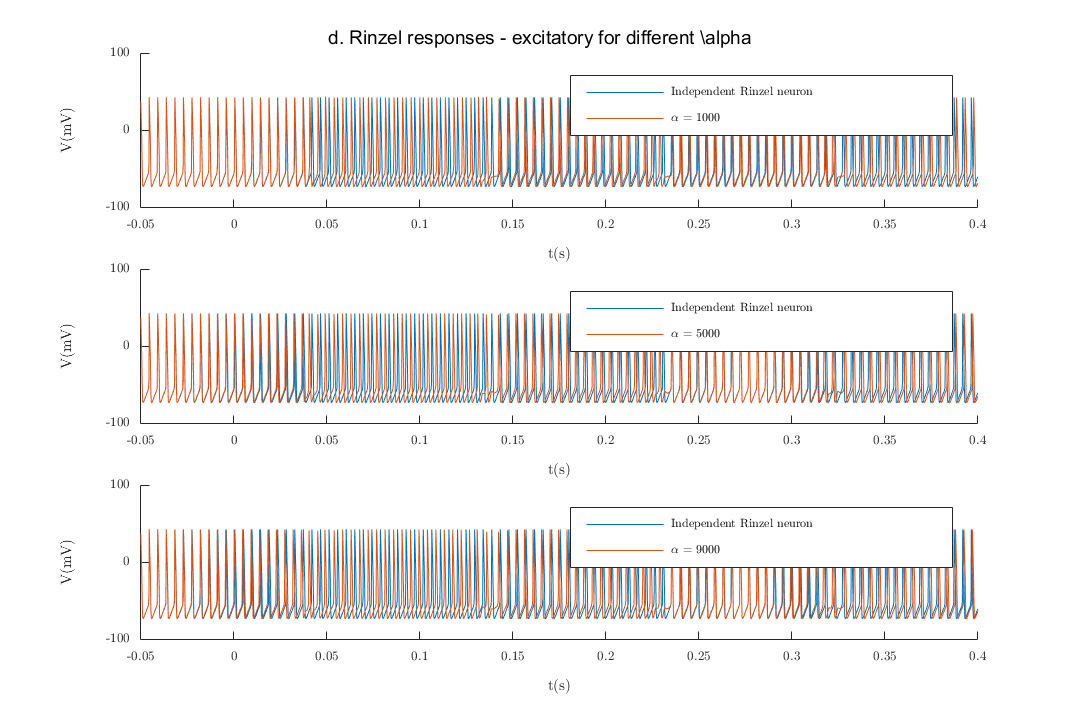

In [11]:
syn.E_rev=0*ones(1,10);
alpha=[1000 5000 9000];

figure(7)
suptitle('d. Rinzel responses - excitatory for different \alpha');

for i=1:length(alpha)
    subplot(length(alpha),1,i);
    hold on
    plot(t,V.rinz);
    syn.alpha=alpha(i);
    [V.rinz_syn,~]=hh_rinzel(t,Iext,repmat(V.bursty,size(syn.E_rev,1)));
    plot(t,V.rinz_syn)
    xlabel('t(s)')
    ylabel('V(mV)')
    legend('Independent Rinzel neuron',['$\alpha$ = ' num2str(syn.alpha)]);
end

We note that for excitatory synapses, increasing the alpha value causes an increase in the enhancement of Rinzel spiking activity in the regions where the bursty neuron spikes. This is due to the fact that an increase in alpha strengthens the synapse.

### e. Time varying $\alpha$

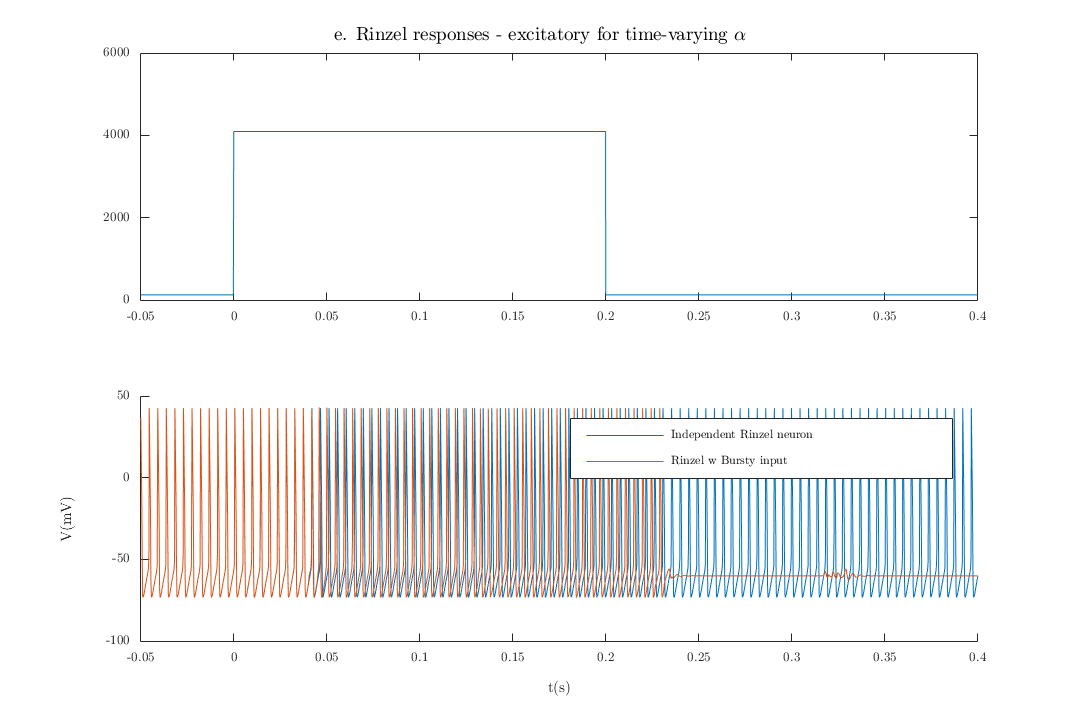

In [12]:
syn.alpha=5^3*ones(size(t));
[~,temp] = min(abs(t));
syn.alpha(temp+1:temp+round(0.2/dt))=8^4;

figure(8)
suptitle('e. Rinzel responses - excitatory for time-varying $\alpha$');
subplot(211)
plot(t,syn.alpha);
subplot(212)
hold on
plot(t,V.rinz);
[V.rinz_syn,~]=hh_rinzel(t,Iext,repmat(V.bursty,size(syn.E_rev,1)));
plot(t,V.rinz_syn)
xlabel('t(s)')
ylabel('V(mV)')
legend('Independent Rinzel neuron','Rinzel w Bursty input');

Taking a time varying $\alpha$ with a high time of 0.2 and low time of 0.25 seconds, we get an "windowed" enhancement (excitatory) in the region where alpha is high and where the bursty neuron spikes. The control over the $\alpha$ parameter here allows us to modulate the strength of the excitatory synapse and thus control the strength of Rinzel spiking in certain regions, decided by Bursty neuron spiking.

# 3. Connecting two Bursty neurons together

We connect two bursty neurons together as shown in the diagram and we see the effect of changing the following parameters on the output spiking activity of both the neurons.

### a. Maximum conductance of two inhibitory synapses

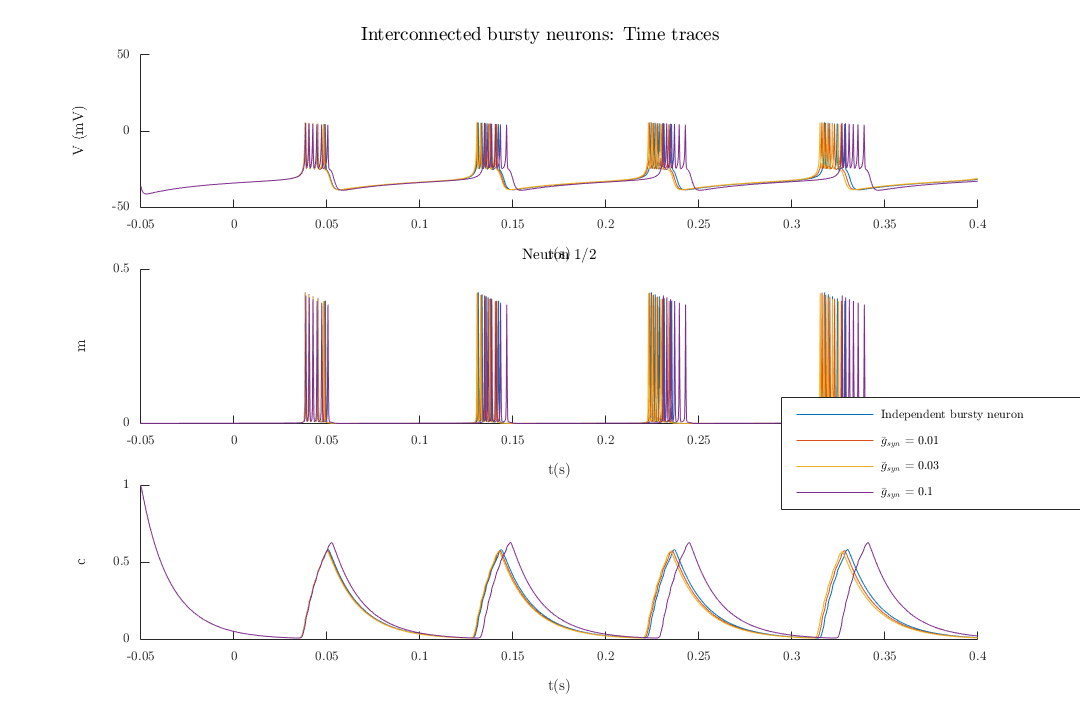

In [13]:
syn.aplha=5000;
Iext=35.6*ones(size(t));
syn.dualsyn=1;
Gsyn=[0.01 0.03 0.1];

figure(9)
suptitle('Interconnected bursty neurons: Time traces');
subplot(3,1,1);ylabel('V (mV)');
hold on; plot(t,V.bursty);
subplot(3,1,2);ylabel('m');title('Neuron 1/2');
hold on; plot(t,x.bursty(1,:));
subplot(3,1,3);ylabel('c');
hold on; plot(t,x.bursty(2,:));

legendinf=cell(1,length(Gsyn)+1);
legendinf{1}='Independent bursty neuron';
for j=1:length(Gsyn)
    syn.E_rev=[-70;-70];
    syn.Gsyn=Gsyn(j);
    out=bursty(t,Iext,[-36;0;1]);
    for i=1:3
       subplot(3,1,i)
       xlabel('t(s)');
       plot(t,out(i,:))
    end
    legendinf{j+1}=['$\bar{g}_{syn}$ = ' num2str(Gsyn(j))];
end
legend(legendinf,'Position',[0.85 0.32 0.1 0.1]);

A higher max conductance value strengthens the synapse, and since inhibitory synapses delay spiking, a higher $\bar{g}_{syn}$ value causes more lag in the spike burst.

### b. Combination of excitatory and inhibitory synapses: {(I,I), (E,I), (E,E)}

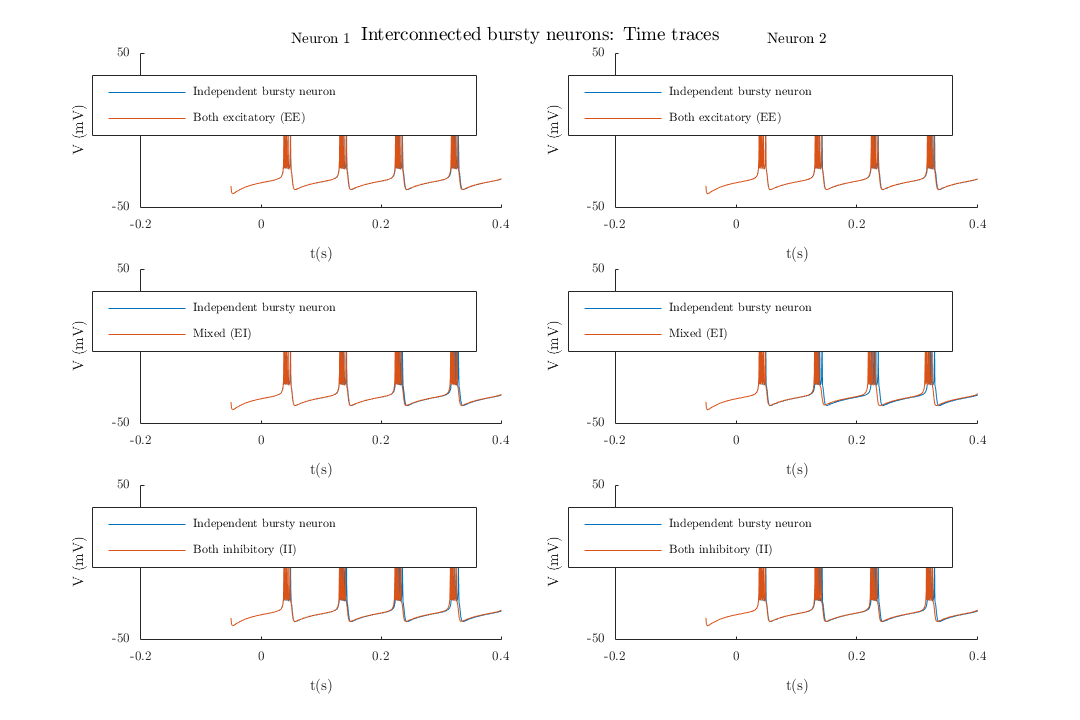

In [14]:
syn.Gsyn=0.03;
syn.dualsyn=1;
temp=[0 0; 0 1; 1 1];

figure(10)
suptitle('Interconnected bursty neurons: Time traces');
subplot(3,2,1);title('Neuron 1');
subplot(3,2,2);title('Neuron 2');
for j=1:size(temp,1)*size(temp,2)
    subplot(3,2,j)
    hold on; plot(t,V.bursty);
    ylabel('V (mV)');
end

for j=1:size(temp,1)
    syn.E_rev=-70*temp(j,:);
    out=bursty(t,Iext,[-36;0;1]);
    for i=1:2
       subplot(3,2,2*j-2+i)
       xlabel('t(s)');
       plot(t,out(3*i-2,:))
    end
end
for j=1:2
   subplot(3,2,j)
   legend('Independent bursty neuron', 'Both excitatory (EE)') 
end
for j=3:4
   subplot(3,2,j)
   legend('Independent bursty neuron', 'Mixed (EI)')
end
for j=5:6
   subplot(3,2,j)
   legend('Independent bursty neuron', 'Both inhibitory (II)')
end

When both synapses are excitatory, we see that both neurons fire spike bursts earlier, and when both synapses are inhibitory, we see that both have a delay in spike burst firing. In the mixed case, the neuron having the excitatory synapse gets a time advancement whereas the one with the inhibitory synapse faces a lag.

### c. Rate of synapse $\alpha$

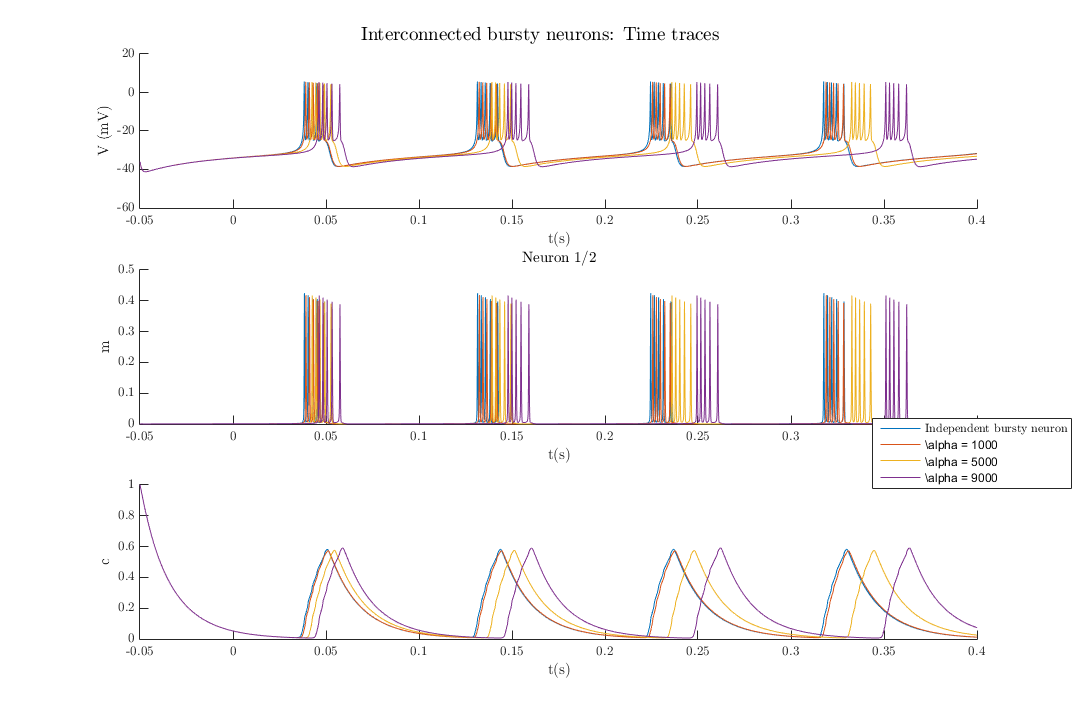

In [15]:
alpha = [1000 5000 9000];
syn.dualsyn=1;

figure(11)
suptitle('Interconnected bursty neurons: Time traces');
subplot(3,1,1);ylabel('V (mV)');
hold on; plot(t,V.bursty);
subplot(3,1,2);ylabel('m');title('Neuron 1/2');
hold on; plot(t,x.bursty(1,:));
subplot(3,1,3);ylabel('c');
hold on; plot(t,x.bursty(2,:));

legendinf=cell(1,length(alpha)+1);
legendinf{1}='Independent bursty neuron';
for j=1:length(alpha)
    syn.E_rev=[-70;-70];
    syn.alpha=alpha(j);
    out=bursty(t,Iext,[-36;0;1]);
    for i=1:3
       subplot(3,1,i)
       xlabel('t(s)');
       plot(t,out(i,:))
    end
    legendinf{j+1}=['\alpha = ' num2str(alpha(j))];
end
legend(legendinf,'Position',[0.85 0.32 0.1 0.1]);

Increasing rate of synapse $\alpha$ increases the strength of the synapse, thereby increasing the time deviation of spike burst from the independent bursty neuron. The direction depends on whether the synapse is excitatory or inhibitory.

### Creation of degenerate responses using varying $\bar{g}_{syn}$ and $\alpha$

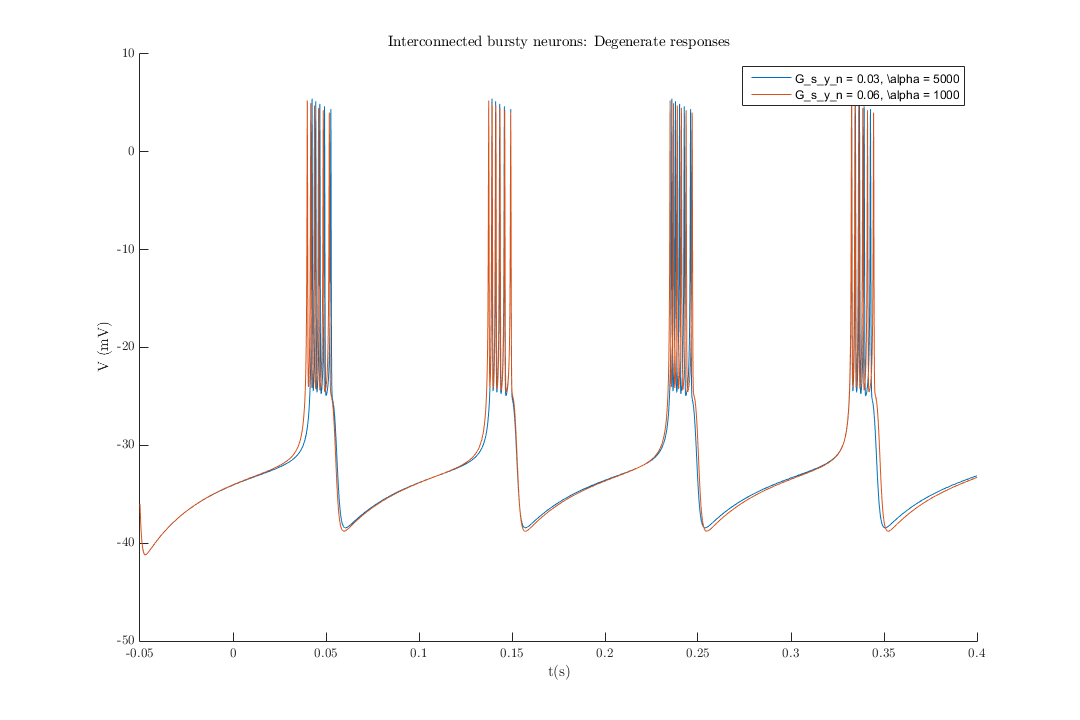

In [16]:
syn.dualsyn=1;
syn.E_rev=[-70;-70];
% alpha and Gsyn
syn.alpha=5000;
syn.Gsyn=0.03;

out=bursty(t,Iext,[-36;0;1]);
figure(12)
title('Interconnected bursty neurons: Degenerate responses');
xlabel('t(s)');ylabel('V (mV)');
hold on;
plot(t,out(1,:));
legendinf=cell(1,2);
legendinf{1}=(['G_s_y_n = ' num2str(syn.Gsyn) ', \alpha = ' num2str(syn.alpha)]);

syn.E_rev=[-70;-70];
syn.alpha=1000;
syn.Gsyn=0.06;
out=bursty(t,Iext,[-36;0;1]);
plot(t,out(1,:));
legendinf{2}=(['G_s_y_n = ' num2str(syn.Gsyn) ', \alpha = ' num2str(syn.alpha)]);
legend(legendinf);

We note that $\bar{g}_{syn}$ and $\alpha$ are multiplied in the synapse equation and can thus be altered simultaneously to generate degenerate outputs.